In [1]:
!pwd


/data/guanqzha/kkb_notes


In [1]:

import pandas as pd
raw = pd.read_csv('/home/guanqzha/Data/train.csv')

raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2306871 entries, 0 to 2306870
Data columns (total 29 columns):
order_detail_id           int64
order_id                  int64
order_total_num           float64
order_amount              float64
order_total_payment       float64
order_total_discount      float64
order_pay_time            object
order_status              int64
order_count               float64
is_customer_rate          float64
order_detail_status       float64
order_detail_goods_num    float64
order_detail_amount       float64
order_detail_payment      float64
order_detail_discount     float64
customer_province         object
customer_city             object
member_id                 float64
customer_id               int64
customer_gender           float64
member_status             float64
is_member_actived         float64
goods_id                  int64
goods_class_id            int64
goods_price               float64
goods_status              float64
goods_has_discount

In [2]:
raw.head()

,order_detail_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,is_customer_rate,...,customer_gender,member_status,is_member_actived,goods_id,goods_class_id,goods_price,goods_status,goods_has_discount,goods_list_time,goods_delist_time
0,1000000,1000000,1.0,239.9,96.9,0.0,2012-11-01 00:10:56,6,1.0,0.0,...,NaN,NaN,NaN,998,998,54.909289,1.0,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07
1,1001530,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,...,NaN,NaN,NaN,1953,1953,45.961352,0.0,1.0,2013-08-28 17:27:50,2013-09-01 00:38:17
2,1001531,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,0.0,...,NaN,NaN,NaN,1083,1083,53.035439,1.0,0.0,2014-10-29 18:21:05,2014-11-05 18:21:05
3,1001532,1001328,3.0,180.0,89.7,0.0,2013-08-31 22:06:35,6,1.0,0.0,...,NaN,NaN,NaN,1013,1013,46.046917,1.0,1.0,2014-10-25 11:00:00,2014-11-01 11:00:00
4,1001533,1001329,1.0,159.9,65.9,0.0,2013-08-31 21:33:36,6,1.0,0.0,...,NaN,NaN,NaN,1628,1628,50.722161,1.0,0.0,2014-10-23 15:35:33,2014-10-30 15:35:33


In [3]:
test = pd.read_csv('/home/guanqzha/Data/submission.csv')
test.head()


,customer_id,result
0,1000000,0.0
1,1000014,0.0
2,1000034,0.0
3,1000046,0.0
4,1000048,0.0


------
## For Raw: 

##### (1) we have prepared and discussed alot in week8. here we decided to delete the following columns which is irrelavent values for the final predictions

-  wrong time : 'goods_has_discount', 'goods_list_time' 
-  too less number registered gender : 'customer_gender'
-  useless: 'member_status', 'member_id', 'order_detail_id', 
-----

In [29]:
raw['is_member_actived'].dropna()

1671053    1.0
1671054    1.0
1671055    1.0
1671056    1.0
1671057    1.0
          ... 
2306866    1.0
2306867    1.0
2306868    1.0
2306869    1.0
2306870    1.0
Name: is_member_actived, Length: 635790, dtype: float64

In [33]:
raw.columns

Index(['order_detail_id', 'order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count', 'is_customer_rate',
       'order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount', 'customer_province',
       'customer_city', 'member_id', 'customer_id', 'customer_gender',
       'member_status', 'is_member_actived', 'goods_id', 'goods_class_id',
       'goods_price', 'goods_status', 'goods_has_discount', 'goods_list_time',
       'goods_delist_time'],
      dtype='object')

In [9]:
import datetime
order_data = raw[['customer_id','order_id', 'order_total_num', 'order_amount',
       'order_total_payment', 'order_total_discount', 'order_pay_time',
       'order_status', 'order_count','order_detail_status', 'order_detail_goods_num', 'order_detail_amount',
       'order_detail_payment', 'order_detail_discount']]


goods_data = raw[['customer_id','goods_price', 'goods_status','goods_has_discount','goods_class_id',"goods_id"]]

customer_data = raw[['customer_id','customer_province','customer_province','is_customer_rate','is_member_actived']]


In [10]:
# order_data['order_pay_time'] = order_data.order_pay_time.map(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')))
# order_data['order_pay_time'] = order_data.order_pay_time.map(lambda x: x.strftime("%m/%Y"))
order_data['order_pay_time']  = pd.to_datetime(order_data['order_pay_time'])
order_data
# order_data['order_pay_time'] = order_data['order_pay_time'].to_period(freq="m")

/home/guanqzha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,customer_id,order_id,order_total_num,order_amount,order_total_payment,order_total_discount,order_pay_time,order_status,order_count,order_detail_status,order_detail_goods_num,order_detail_amount,order_detail_payment,order_detail_discount
0,1000000,1000000,1.0,239.9,96.9,0.0,2012-11-01 00:10:56,6,1.0,6.0,1.0,96.9,96.9,143.0
1,1001324,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,6.0,1.0,0.0,0.0,99.0
2,1001324,1001327,2.0,288.0,96.9,0.0,2013-08-31 23:14:42,6,2.0,6.0,1.0,96.9,96.9,92.1
3,1001325,1001328,3.0,180.0,89.7,0.0,2013-08-31 22:06:35,6,1.0,6.0,3.0,89.7,89.7,90.3
4,1001326,1001329,1.0,159.9,65.9,0.0,2013-08-31 21:33:36,6,1.0,6.0,1.0,65.9,65.9,94.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2306866,2826573,3238358,1.0,199.0,59.9,0.0,2013-01-10 19:24:31,6,1.0,6.0,1.0,59.9,59.9,139.1
2306867,2826574,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,6.0,1.0,0.0,0.0,59.9
2306868,2826574,3238359,2.0,299.8,89.9,0.0,2013-01-27 15:00:27,6,2.0,6.0,1.0,89.9,89.9,150.0
2306869,2826574,3238360,1.0,168.0,76.9,0.0,2012-11-11 00:10:37,6,1.0,6.0,1.0,76.9,76.9,91.1


In [11]:
order_data["order_pay_time"] = order_data["order_pay_time"].map(lambda x: 1000*x.year+x.month)


/home/guanqzha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


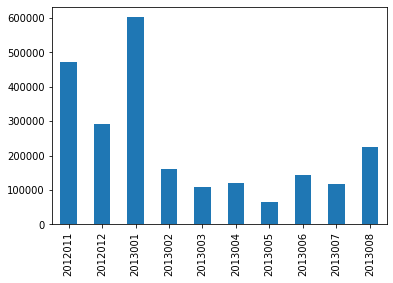

In [13]:
order_data.order_pay_time.value_counts().sort_index(ascending=True).plot(kind='bar')

In [18]:
def
order_data["order_total_discount"]= order_data.groupby("order_id")

0.00     1675812
10.00      40629
3.00       36272
5.00       27163
40.00      23254
          ...   
84.34          1
66.40          1
51.73          1
51.77          1
80.04          1
Name: order_total_discount, Length: 7970, dtype: int64

### After basic EDA , we will go to form the data

In [2]:
import numpy as np
import datetime


In [10]:

def time2multi(x):
    t = datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
    # 2013-01-01 的day = 1, weekday = 星期二（2-1=1）
    return pd.Series([t.month, t.day, t.weekday(), t.hour])
def process(data):
    data = pd.DataFrame(raw.groupby('customer_id')['customer_gender'].last().fillna(0))
    data[['goods_id_last', 'goods_status_last', 'goods_price_last', 'goods_has_discount_last',           'goods_list_time_last', 'goods_delist_time_last']] = raw.groupby('customer_id')['goods_id',             'goods_status', 'goods_price', 'goods_has_discount', 'goods_list_time', 'goods_delist_time'].last()
    data[['order_total_num_last', 'order_amount_last', 'order_total_payment_last', 'order_total_discount_last', 'order_pay_time_last',           'order_status_last', 'order_count_last', 'is_customer_rate_last', 'order_detail_status_last', 'order_detail_goods_num_last',           'order_detail_amount_last', 'order_detail_payment_last', 'order_detail_discount']] = raw.groupby('customer_id')['order_total_num',         'order_amount', 'order_total_payment', 'order_total_discount', 'order_pay_time', 'order_status', 'order_count', 'is_customer_rate',         'order_detail_status', 'order_detail_goods_num', 'order_detail_amount', 'order_detail_payment', 'order_detail_discount'].last()
    # 添加商品原始价格（多种统计字段） goods_price： mean, min, max, std
    data[['goods_price_mean', 'goods_price_min', 'goods_price_max', 'goods_price_std']] =         raw.groupby('customer_id')['goods_price'].agg([
            ('goods_price_mean', 'mean'),
            ('goods_price_min', 'min'),
            ('goods_price_max', 'max'),
            ('goods_price_std', 'std')])
    data['count'] = raw.groupby('customer_id')['order_id'].nunique()
    data['order_total_sum'] = raw.groupby('customer_id')['order_total_num'].sum()
        # 用户所在省份
    data['customer_province'] = raw.groupby('customer_id')['customer_province'].last()
        # 用户所在城市
    data['customer_city'] = raw.groupby('customer_id')['customer_city'].last()
        # 用户是否评价 统计结果（平均，总和）
    data[['is_customer_rate_ratio', 'is_customer_rate_sum']] = raw.groupby('customer_id')['is_customer_rate'].agg([
            ('is_customer_rate_ratio', np.mean),
            ('is_customer_rate_sum', np.sum)
        ])
        # 用户购买的goods数量
    data['order_detail_total_num'] = raw.groupby('customer_id')['order_detail_goods_num'].sum()
        # 商品折扣统计属性（sum, mean）
    data[['goods_has_discount_sum', 'goods_has_discount_mean']] = raw.groupby('customer_id')['goods_has_discount'].agg([
            ('goods_has_discount_sum', np.sum),
            ('goods_has_discount_mean', np.mean)
        ])
        # 订单实付金额 统计属性（sum, mean）
    data[['order_total_payment_sum', 'order_total_payment_mean']] = raw.groupby('customer_id')['order_total_payment'].agg([
            ('order_total_payment_sum', np.sum),
            ('order_total_payment_mean', np.mean)
        ])
    
    data[['order_pay_time_last_m', 'order_pay_time_last_d', 'order_pay_time_last_week', 'order_pay_time_last_h']] = data['order_pay_time_last'].apply(time2multi)
    t_str = '2012-11-01 00:00:00'
    t = datetime.datetime.strptime(t_str, '%Y-%m-%d %H:%M:%S')
    data['order_pay_time_last_diff'] = data['order_pay_time_last'].map(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S') - t).days/365)
    return data
test = process(raw)

In [8]:
train_raw = raw[raw['order_pay_time'] <= '2013-05-31 23:59:59']

train_raw = process(train_raw)
train_raw



,customer_gender,goods_id_last,goods_status_last,goods_price_last,goods_has_discount_last,goods_list_time_last,goods_delist_time_last,order_total_num_last,order_amount_last,order_total_payment_last,...,order_detail_total_num,goods_has_discount_sum,goods_has_discount_mean,order_total_payment_sum,order_total_payment_mean,order_pay_time_last_m,order_pay_time_last_d,order_pay_time_last_week,order_pay_time_last_h,order_pay_time_last_diff
customer_id,,,,,,,,,,,,,,,,,,,,,
1000000,0.0,998,1.0,54.909289,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,1.0,239.9,96.90,...,1.0,0.0,0.00,96.9,96.900000,11,1,3,0,0.000000
1000014,0.0,1038,1.0,49.554744,0.0,2014-10-28 14:26:28,2014-11-04 14:26:28,1.0,129.9,66.90,...,1.0,0.0,0.00,66.9,66.900000,8,3,5,21,0.753425
1000034,0.0,998,1.0,54.776450,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,2.0,299.8,99.90,...,2.0,0.0,0.00,199.8,99.900000,3,8,4,10,0.347945
1000046,0.0,1193,1.0,44.150281,1.0,2014-10-25 17:02:22,2014-11-01 17:02:22,1.0,80.0,39.90,...,1.0,1.0,1.00,39.9,39.900000,6,7,4,12,0.597260
1000048,0.0,998,1.0,54.866957,0.0,2014-10-25 11:08:07,2014-11-01 11:08:07,1.0,239.9,89.90,...,1.0,0.0,0.00,89.9,89.900000,12,12,2,0,0.112329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2826570,0.0,1203,1.0,53.071121,0.0,2014-10-24 09:19:42,2014-10-31 09:19:42,1.0,199.9,99.90,...,1.0,0.0,0.00,99.9,99.900000,8,9,4,12,0.769863
2826571,0.0,1038,1.0,49.624932,0.0,2014-10-28 14:26:28,2014-11-04 14:26:28,1.0,129.9,59.90,...,1.0,0.0,0.00,59.9,59.900000,1,18,4,10,0.213699
2826572,0.0,2128,1.0,53.047546,0.0,2014-10-28 12:01:29,2014-11-04 12:01:29,4.0,707.7,238.38,...,8.0,0.0,0.00,1793.1,256.157143,1,24,3,0,0.230137


In [11]:
label_raw = set(raw[raw['order_pay_time'] > '2013-05-31 23:59:59']['customer_id'].dropna())
train_raw['label'] = train_raw.index.map(lambda x:int(x in label_raw))

import pickle
with open('test.pkl', 'wb') as file:
    pickle.dump(test, file)
with open('train_raw.pkl', 'wb') as file:
    pickle.dump(train_raw, file)

In [3]:
import pickle
with open('train_raw.pkl', 'rb') as file1:
    train_raw = pickle.load(file1)
with open('test.pkl', 'rb') as file2:
    test = pickle.load(file2)

In [4]:
train_data = train_raw.drop(['goods_list_time_last', 'goods_delist_time_last', 'order_pay_time_last'], axis=1)
train_data['customer_province'].fillna('0', inplace=True)
train_data['customer_city'].fillna('0', inplace=True)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['customer_province'] = le.fit_transform(train_data['customer_province'])
train_data['customer_city'] = le.fit_transform(train_data['customer_city'])
# train_data = train_data.drop(['customer_province', 'customer_city'], axis=1)
train_data['customer_province'] = train_data['customer_province'].astype('int64')
train_data['customer_city'] = train_data['customer_city'].astype('int64')

In [5]:
train_data.fillna(0,inplace=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1585986 entries, 1000000 to 2826574
Data columns (total 38 columns):
customer_gender                1585986 non-null float64
goods_id_last                  1585986 non-null int64
goods_status_last              1585986 non-null float64
goods_price_last               1585986 non-null float64
goods_has_discount_last        1585986 non-null float64
order_total_num_last           1585986 non-null float64
order_amount_last              1585986 non-null float64
order_total_payment_last       1585986 non-null float64
order_total_discount_last      1585986 non-null float64
order_status_last              1585986 non-null int64
order_count_last               1585986 non-null float64
is_customer_rate_last          1585986 non-null float64
order_detail_status_last       1585986 non-null float64
order_detail_goods_num_last    1585986 non-null float64
order_detail_amount_last       1585986 non-null float64
order_detail_payment_last      1585986 non-nu

In [ ]:
from tpot import TPOTClassifier 
xtrain = train_data.drop(['label','goods_price_std'],axis=1)
ytrain = train_data['label']

tpot = TPOTClassifier(verbosity=2, generations=5)
tpot.fit(xtrain, ytrain)
y_pred = tpot.predict(test)

y_pred = pd.DataFrame(y_pred)
s = pd.read_csv('/home/guanqzha/Data/submission.csv')
s['result'] = y_pred
s.to_csv("finals.csv")

Version 0.10.2 of tpot is outdated. Version 0.11.7 was released 3 days ago.


okCharlie123
0.61698	完成	2021-01-10 20:07